In [14]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# Display all columns
pd.set_option('display.max_columns', None)
# Customize column names
col_names = ['ID','Diagnosis','radius','texture','perimeter','area','smoothness','compactness',
             'concavity','concave_pts','symmetry','fractal_dim','radius_std','texture_std',
             'perimeter_std','area_std', 'smoothness_std','compactness_std','concavity_std',
             'concave_pts_std','symmetry_std','fractal_dim_std','radius_ext','texture_ext',
             'perimeter_ext','area_ext','smoothness_ext','compactness_ext','concavity_ext',
             'concave_pts_ext','symmetry_ext','fractal_dim_ext']
# Import data
df = pd.read_table('wdbc.data',sep=',',names = col_names)
df.head()

,ID,Diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_pts,symmetry,fractal_dim,radius_std,texture_std,perimeter_std,area_std,smoothness_std,compactness_std,concavity_std,concave_pts_std,symmetry_std,fractal_dim_std,radius_ext,texture_ext,perimeter_ext,area_ext,smoothness_ext,compactness_ext,concavity_ext,concave_pts_ext,symmetry_ext,fractal_dim_ext
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Examine data info and shape
display(df.info(), df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               569 non-null    int64  
 1   Diagnosis        569 non-null    object 
 2   radius           569 non-null    float64
 3   texture          569 non-null    float64
 4   perimeter        569 non-null    float64
 5   area             569 non-null    float64
 6   smoothness       569 non-null    float64
 7   compactness      569 non-null    float64
 8   concavity        569 non-null    float64
 9   concave_pts      569 non-null    float64
 10  symmetry         569 non-null    float64
 11  fractal_dim      569 non-null    float64
 12  radius_std       569 non-null    float64
 13  texture_std      569 non-null    float64
 14  perimeter_std    569 non-null    float64
 15  area_std         569 non-null    float64
 16  smoothness_std   569 non-null    float64
 17  compactness_std 

None

(569, 32)

In [4]:
# Check for duplicate IDs
df['ID'].value_counts(ascending = False).head()

ID
842302     1
90250      1
901315     1
9013579    1
9013594    1
Name: count, dtype: int64

In [5]:
# Check class balance
df.Diagnosis.value_counts()

Diagnosis
B    357
M    212
Name: count, dtype: int64

In [6]:
# Check for 2 classes
df.Diagnosis.unique()

array(['M', 'B'], dtype=object)

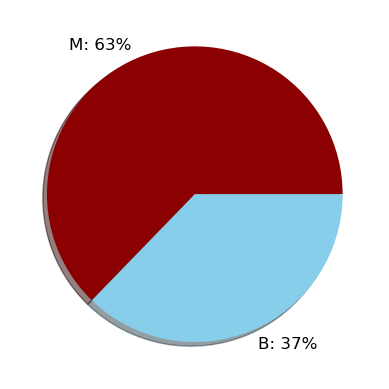

In [7]:
# Pie chart for class balance
plt.rcParams['font.size'] = 12
plt.pie(df.Diagnosis.value_counts(), colors = ['darkred','skyblue'], shadow = True,
        labels = ['M: 63%','B: 37%']);

In [8]:
# Check for null
df.isnull().sum()

ID                 0
Diagnosis          0
radius             0
texture            0
perimeter          0
area               0
smoothness         0
compactness        0
concavity          0
concave_pts        0
symmetry           0
fractal_dim        0
radius_std         0
texture_std        0
perimeter_std      0
area_std           0
smoothness_std     0
compactness_std    0
concavity_std      0
concave_pts_std    0
symmetry_std       0
fractal_dim_std    0
radius_ext         0
texture_ext        0
perimeter_ext      0
area_ext           0
smoothness_ext     0
compactness_ext    0
concavity_ext      0
concave_pts_ext    0
symmetry_ext       0
fractal_dim_ext    0
dtype: int64

In [9]:
# Also check for 0 values
df[df.eq(0).any(axis = 1)]

,ID,Diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_pts,symmetry,fractal_dim,radius_std,texture_std,perimeter_std,area_std,smoothness_std,compactness_std,concavity_std,concave_pts_std,symmetry_std,fractal_dim_std,radius_ext,texture_ext,perimeter_ext,area_ext,smoothness_ext,compactness_ext,concavity_ext,concave_pts_ext,symmetry_ext,fractal_dim_ext
101,862722,B,6.981,13.43,43.79,143.5,0.11700,0.07568,0.0,0.0,0.1930,0.07818,0.2241,1.5080,1.553,9.833,0.010190,0.010840,0.0,0.0,0.02659,0.004100,7.930,19.54,50.41,185.2,0.15840,0.12020,0.0,0.0,0.2932,0.09382
140,868999,B,9.738,11.97,61.24,288.5,0.09250,0.04102,0.0,0.0,0.1903,0.06422,0.1988,0.4960,1.218,12.260,0.006040,0.005656,0.0,0.0,0.02277,0.003220,10.620,14.10,66.53,342.9,0.12340,0.07204,0.0,0.0,0.3105,0.08151
174,871642,B,10.660,15.15,67.49,349.6,0.08792,0.04302,0.0,0.0,0.1928,0.05975,0.3309,1.9250,2.155,21.980,0.008713,0.010170,0.0,0.0,0.03265,0.001002,11.540,19.20,73.20,408.3,0.10760,0.06791,0.0,0.0,0.2710,0.06164
175,872113,B,8.671,14.45,54.42,227.2,0.09138,0.04276,0.0,0.0,0.1722,0.06724,0.2204,0.7873,1.435,11.360,0.009172,0.008007,0.0,0.0,0.02711,0.003399,9.262,17.04,58.36,259.2,0.11620,0.07057,0.0,0.0,0.2592,0.07848
192,875099,B,9.720,18.22,60.73,288.1,0.06950,0.02344,0.0,0.0,0.1653,0.06447,0.3539,4.8850,2.230,21.690,0.001713,0.006736,0.0,0.0,0.03799,0.001688,9.968,20.83,62.25,303.8,0.07117,0.02729,0.0,0.0,0.1909,0.06559
314,894047,B,8.597,18.60,54.09,221.2,0.10740,0.05847,0.0,0.0,0.2163,0.07359,0.3368,2.7770,2.222,17.810,0.020750,0.014030,0.0,0.0,0.06146,0.006820,8.952,22.44,56.65,240.1,0.13470,0.07767,0.0,0.0,0.3142,0.08116
391,903483,B,8.734,16.84,55.27,234.3,0.10390,0.07428,0.0,0.0,0.1985,0.07098,0.5169,2.0790,3.167,28.850,0.015820,0.019660,0.0,0.0,0.01865,0.006736,10.170,22.80,64.01,317.0,0.14600,0.13100,0.0,0.0,0.2445,0.08865
473,9113846,B,12.270,29.97,77.42,465.4,0.07699,0.03398,0.0,0.0,0.1701,0.05960,0.4455,3.6470,2.884,35.130,0.007339,0.008243,0.0,0.0,0.03141,0.003136,13.450,38.05,85.08,558.9,0.09422,0.05213,0.0,0.0,0.2409,0.06743
538,921092,B,7.729,25.49,47.98,178.8,0.08098,0.04878,0.0,0.0,0.1870,0.07285,0.3777,1.4620,2.492,19.140,0.012660,0.009692,0.0,0.0,0.02882,0.006872,9.077,30.92,57.17,248.0,0.12560,0.08340,0.0,0.0,0.3058,0.09938
550,923748,B,10.860,21.48,68.51,360.5,0.07431,0.04227,0.0,0.0,0.1661,0.05948,0.3163,1.3040,2.115,20.670,0.009579,0.011040,0.0,0.0,0.03004,0.002228,11.660,24.77,74.08,412.3,0.10010,0.07348,0.0,0.0,0.2458,0.06592


Represents 13/569 = 2.3% of sample, all B (false) cases. Not in the class of interest so will leave as is.

In [10]:
# Scale numerical features to examine distribution
num_cols = [i for i in col_names if i != 'Diagnosis']

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.drop('Diagnosis', axis = 1))
scaled_df = pd.DataFrame(scaled_df, columns=num_cols)
scaled_df

,ID,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_pts,symmetry,fractal_dim,radius_std,texture_std,perimeter_std,area_std,smoothness_std,compactness_std,concavity_std,concave_pts_std,symmetry_std,fractal_dim_std,radius_ext,texture_ext,perimeter_ext,area_ext,smoothness_ext,compactness_ext,concavity_ext,concave_pts_ext,symmetry_ext,fractal_dim_ext
0,-0.236405,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.236403,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.431741,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.432121,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,0.432201,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-0.235732,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,2.379583,2.604187,1.086384,0.191805,0.666001,2.067178,-1.138416,0.167980,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,-0.235730,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,1.156857,1.291565,-0.424010,-0.069758,0.252202,0.808431,-0.189161,-0.490556,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,-0.235727,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,0.276693,0.180698,-0.379342,0.661277,0.510827,0.612157,-0.891416,0.036727,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,-0.235725,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,1.438530,1.009503,-0.173000,2.017716,1.302285,0.785721,0.326634,0.904057,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


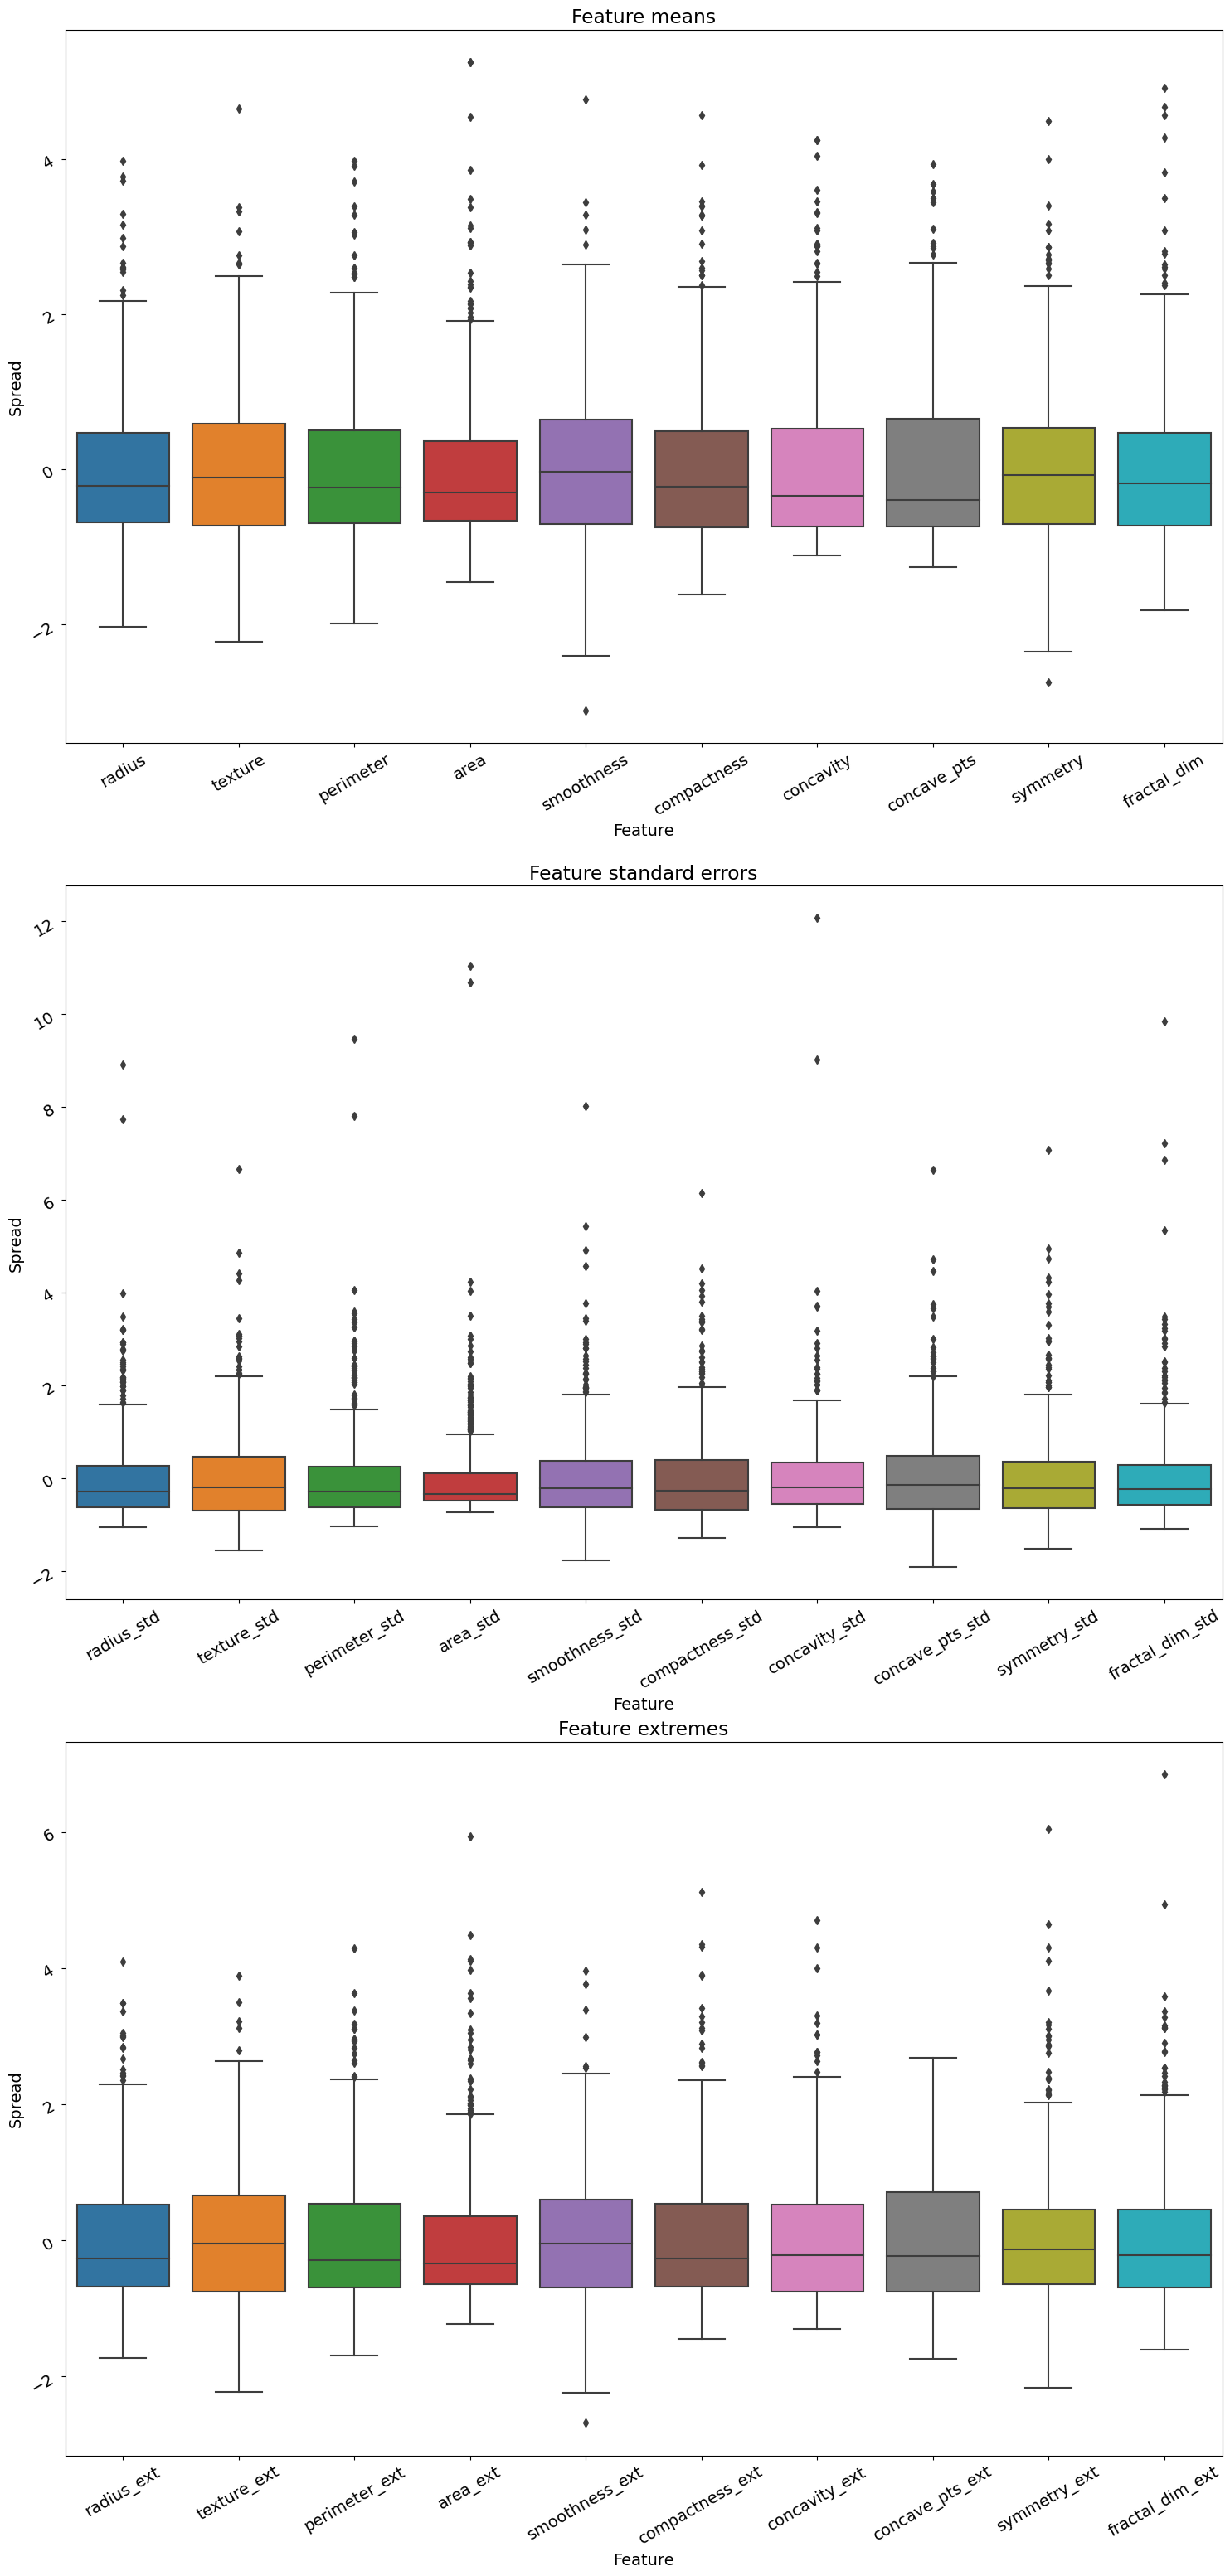

In [11]:
# Plot scaled feature distributions
plt.rcParams['font.size'] = 14

means = ['radius','texture','perimeter','area','smoothness','compactness','concavity',
         'concave_pts','symmetry','fractal_dim']
stds = ['radius_std','texture_std','perimeter_std','area_std', 'smoothness_std',
        'compactness_std','concavity_std','concave_pts_std','symmetry_std','fractal_dim_std']
exts = ['radius_ext','texture_ext','perimeter_ext','area_ext','smoothness_ext',
        'compactness_ext','concavity_ext','concave_pts_ext','symmetry_ext','fractal_dim_ext']

df_means = pd.melt(scaled_df, id_vars = 'ID', var_name = 'Means', value_vars = means)
df_stds = pd.melt(scaled_df, id_vars = 'ID', var_name = 'Std errors', value_vars = stds)
df_exts = pd.melt(scaled_df, id_vars = 'ID', var_name = 'Extremes', value_vars = exts)
         
fig,ax = plt.subplots(3, 1, figsize = (18, 38))
fig.subplots_adjust(wspace = 10)

sns.boxplot(ax = ax[0], x = 'Means', y = 'value', data = df_means)
ax[0].set_title('Feature means')
ax[0].tick_params(labelrotation = 30)

sns.boxplot(ax = ax[1], x = 'Std errors', y = 'value', data = df_stds)
ax[1].set_title('Feature standard errors')
ax[1].tick_params(labelrotation = 30)

sns.boxplot(ax = ax[2], x = 'Extremes', y = 'value', data = df_exts)
ax[2].set_title('Feature extremes')
ax[2].tick_params(labelrotation = 30)

for p in [0, 1, 2]:
    ax[p].set_ylabel('Spread')
    ax[p].set_xlabel('Feature')

plt.show();

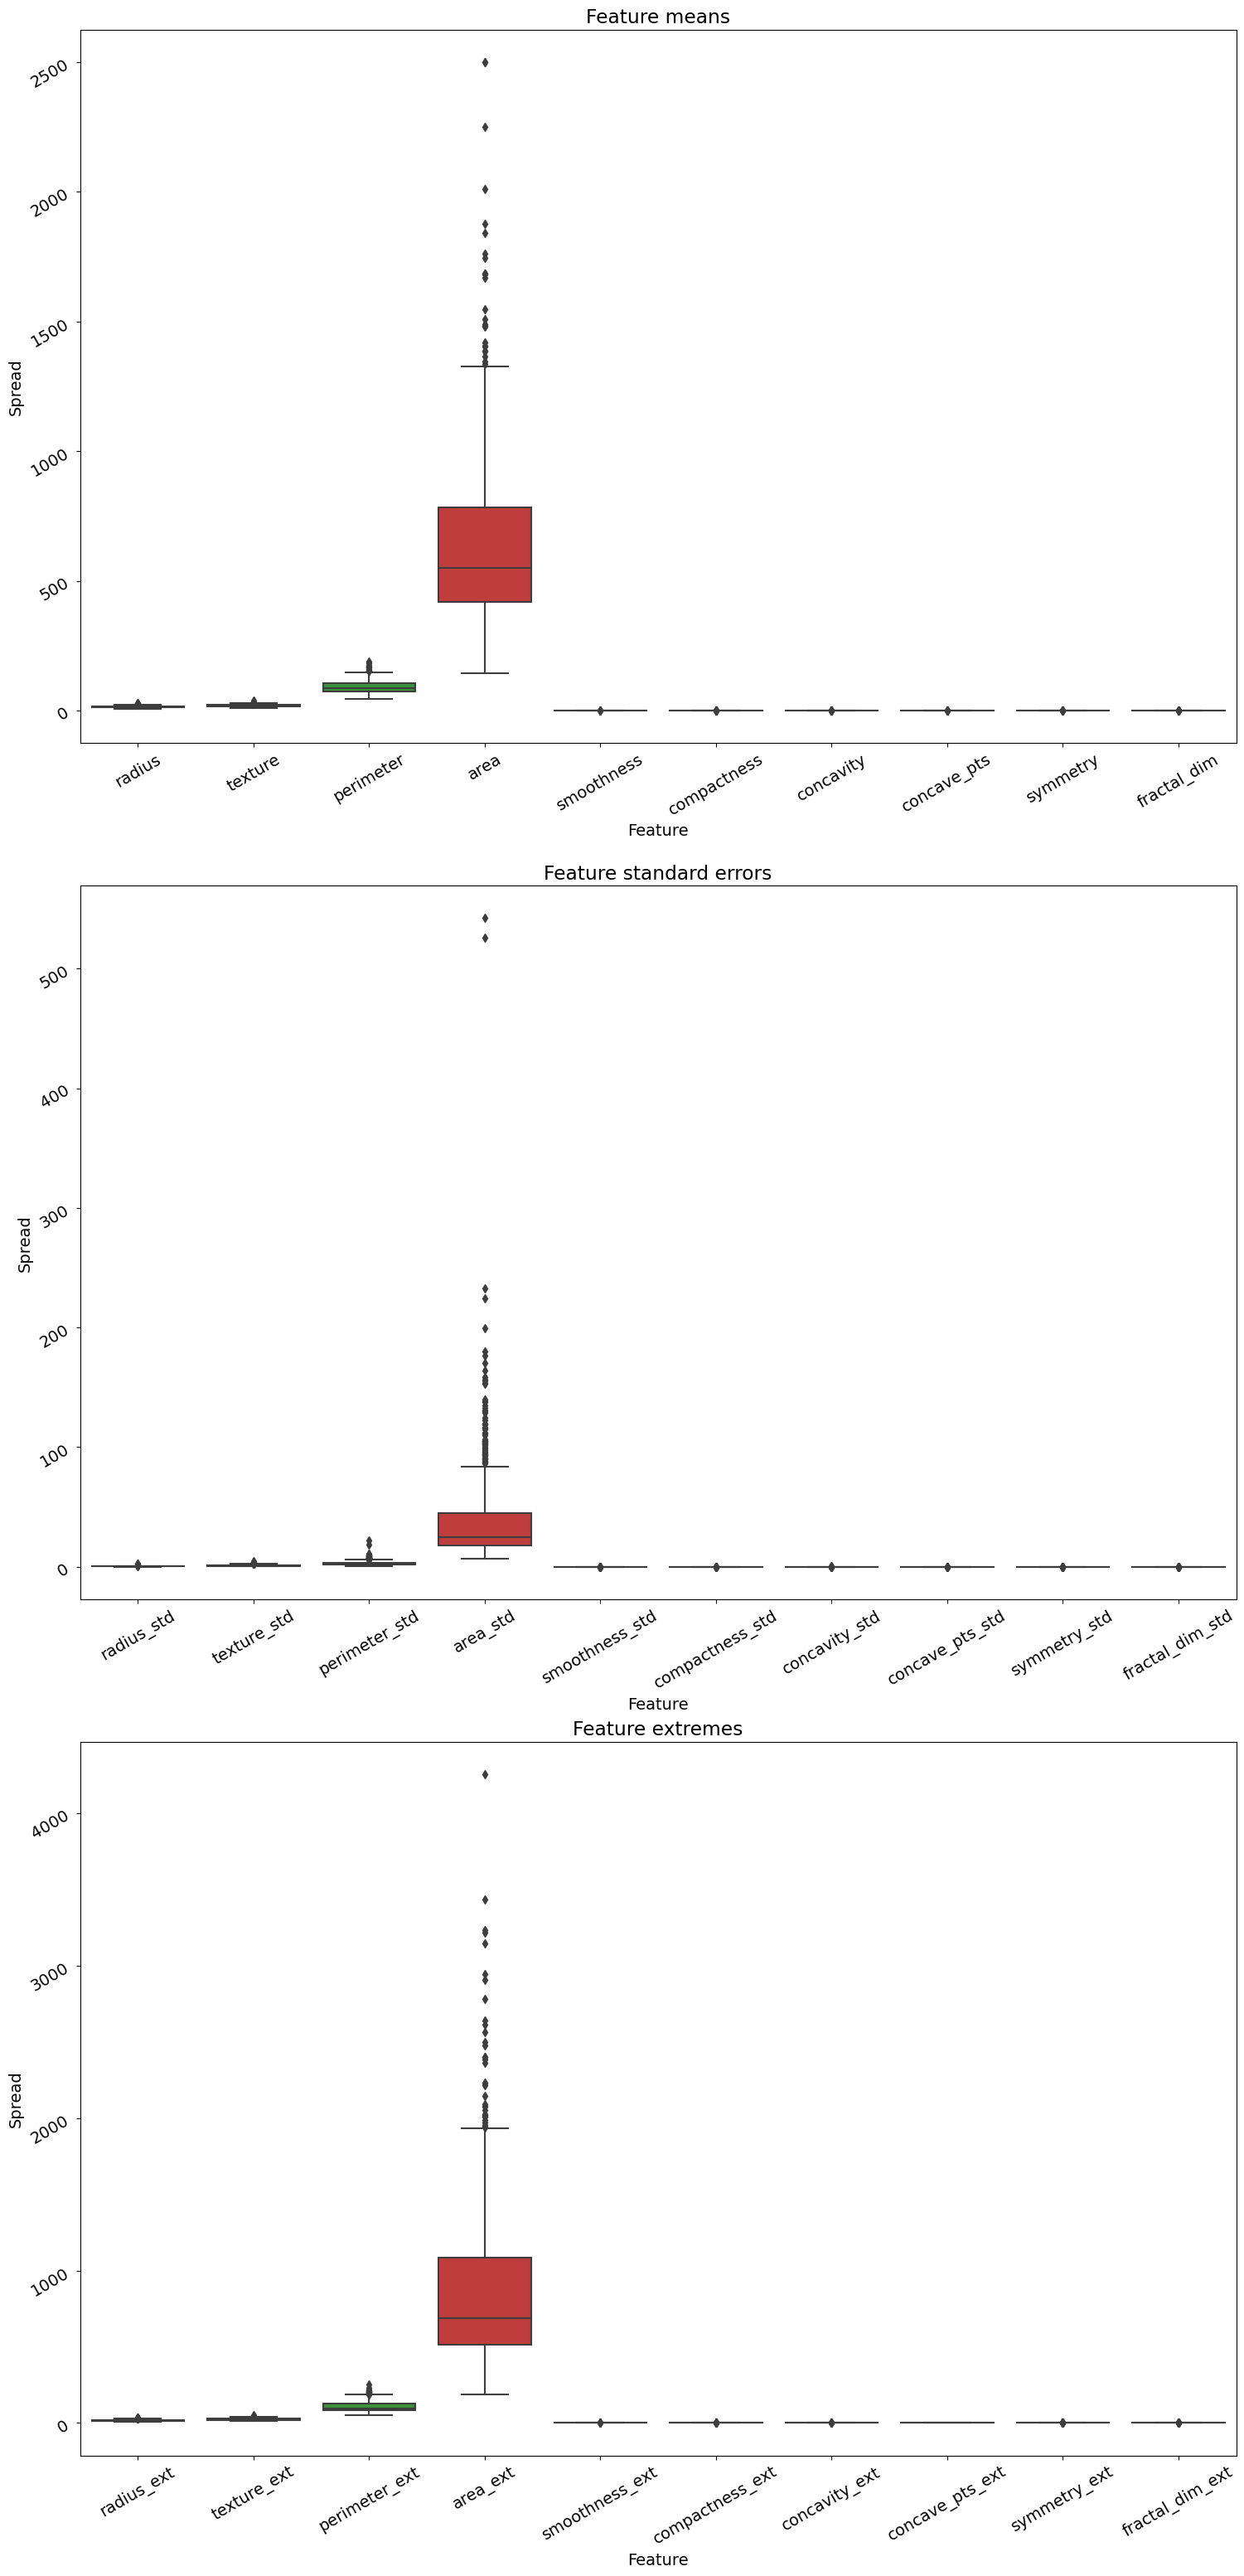

In [12]:
# Plot unscaled feature distributions
df_means = pd.melt(df, id_vars = 'ID', var_name = 'Means', value_vars = means)
df_stds = pd.melt(df, id_vars = 'ID', var_name = 'Std errors', value_vars = stds)
df_exts = pd.melt(df, id_vars = 'ID', var_name = 'Extremes', value_vars = exts)
         
fig,ax = plt.subplots(3, 1, figsize = (18, 38))
fig.subplots_adjust(wspace = 10)

sns.boxplot(ax = ax[0], x = 'Means', y = 'value', data = df_means)
ax[0].set_title('Feature means')
ax[0].tick_params(labelrotation = 30)

sns.boxplot(ax = ax[1], x = 'Std errors', y = 'value', data = df_stds)
ax[1].set_title('Feature standard errors')
ax[1].tick_params(labelrotation = 30)

sns.boxplot(ax = ax[2], x = 'Extremes', y = 'value', data = df_exts)
ax[2].set_title('Feature extremes')
ax[2].tick_params(labelrotation = 30)

for p in [0, 1, 2]:
    ax[p].set_ylabel('Spread')
    ax[p].set_xlabel('Feature')

plt.show();

In [13]:
# Save scaled data
scaled_df.to_csv('scaled_data')